In [2]:
import wandb
import matplotlib.pyplot as plt

In [3]:
from plots import compare_runs_by_category, plot_training_curves, fetch_multiple_runs

# Baseline vs Best model

✓ Fetched data for run: baseline (4kg85c4u)
✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_seed=0 (6vl60a3a)


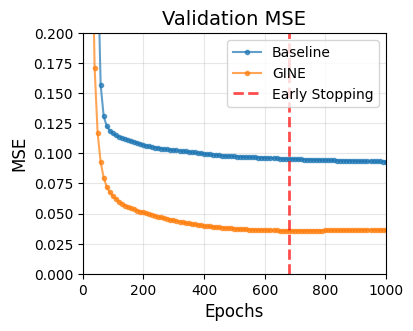

✓ Fetched data for run: baseline (4kg85c4u)
✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_seed=0 (6vl60a3a)


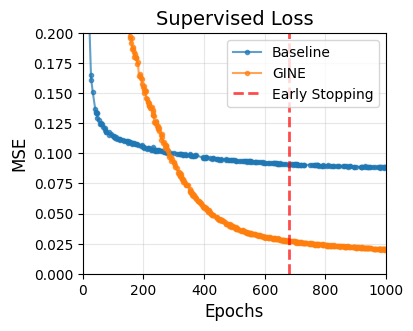

✓ Fetched data for run: baseline (4kg85c4u)
✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_seed=0 (6vl60a3a)


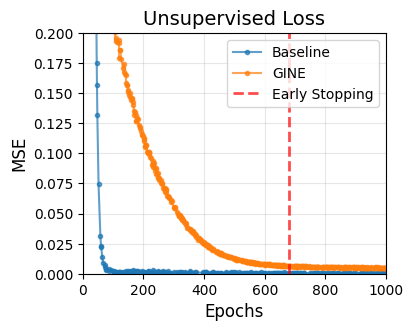

In [ ]:
entity = "carlahugod-danmarks-tekniske-universitet-dtu"
project = "GNN_semi_supervised"
metrics = ['val_MSE', 'supervised_loss', 'unsupervised_loss']
metric_titles = {'val_MSE': 'Validation MSE', 'supervised_loss': 'Supervised Loss', 'unsupervised_loss': 'Unsupervised Loss'}
runs_ids = ['4kg85c4u','6vl60a3a']
labels = ['Baseline', 'GINE']

for metric in metrics:
    runs_data = fetch_multiple_runs(entity, project, runs_ids, metric)

    plt.figure(figsize=(4, 3))
    for run_id, data in runs_data.items():
        history = data["history"]

        label = labels[runs_ids.index(run_id)] if labels else run_id

        # Plot the metric
        if metric in history.columns and "_step" in history.columns:
            # Filter out NaN values
            valid_data = history[[metric, "_step"]].dropna()
            plt.plot(valid_data["_step"], valid_data[metric], label=label, marker='o', markersize=3, alpha=0.7)
        else:
            print(f"Warning: {metric} not found in run {run_id}")

    plt.axvline(x=680, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Early Stopping')
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.ylim(0,0.2)
    plt.xlim(0,1000)
    plt.tight_layout()
    plt.title(metric_titles.get(metric, metric), fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.show()

✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_Supervised_seed=0 (hn8qr8c7)
✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_Supervised_seed=0 (hn8qr8c7)
✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_Supervised_seed=0 (hn8qr8c7)


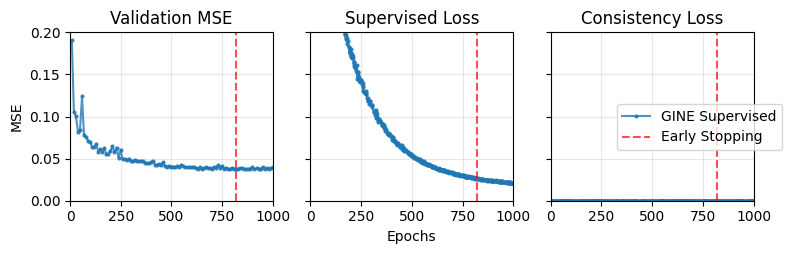

In [8]:
import matplotlib.pyplot as plt

entity = "carlahugod-danmarks-tekniske-universitet-dtu"
project = "GNN_semi_supervised"
metrics = ['val_MSE', 'supervised_loss', 'unsupervised_loss']
metric_titles = {
    'val_MSE': 'Validation MSE',
    'supervised_loss': 'Supervised Loss',
    'unsupervised_loss': 'Consistency Loss'
}
runs_ids = ['hn8qr8c7']
labels = ['GINE Supervised']

# share both x and y axes
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)

for ax, metric in zip(axes, metrics):

    runs_data = fetch_multiple_runs(entity, project, runs_ids, metric)

    for run_id, data in runs_data.items():
        history = data["history"]
        label = labels[runs_ids.index(run_id)]

        if metric in history.columns and "_step" in history.columns:
            valid = history[[metric, "_step"]].dropna()
            ax.plot(
                valid["_step"],
                valid[metric],
                label=label,
                marker='o',
                markersize=2,
                alpha=0.8
            )
        else:
            print(f"Warning: {metric} missing in run {run_id}")

    # early stopping marker
    ax.axvline(
        x=820,
        color='red',
        linestyle='--',
        linewidth=1.5,
        alpha=0.7,
        label='Early Stopping'
    )

    ax.set_title(metric_titles.get(metric, metric), fontsize=12)
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel("MSE")
axes[1].set_xlabel("Epochs")

# add early stopping label only once
handles, _ = axes[0].get_legend_handles_labels()
labels = [labels[0], 'Early Stopping']

# force consistent limits for all plots
axes[0].set_ylim(0, 0.2)
axes[0].set_xlim(0, 1000)

# shared legend middle right
fig.legend(labels, loc="center right", fontsize=10)

plt.tight_layout(rect=[0, 0.12, 1, 1])
plt.show()

✓ Fetched data for run: baseline (4kg85c4u)
✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_Supervised_seed=0 (hn8qr8c7)
✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_seed=0 (6vl60a3a)
✓ Fetched data for run: baseline (4kg85c4u)
✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_Supervised_seed=0 (hn8qr8c7)
✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_seed=0 (6vl60a3a)
✓ Fetched data for run: baseline (4kg85c4u)
✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_Supervised_seed=0 (hn8qr8c7)
✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_seed=0 (6vl60a3a)


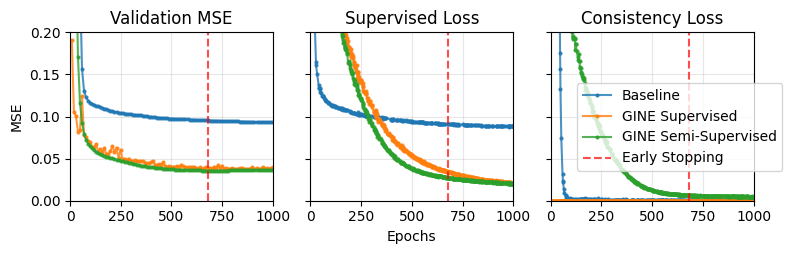

In [9]:
import matplotlib.pyplot as plt

entity = "carlahugod-danmarks-tekniske-universitet-dtu"
project = "GNN_semi_supervised"
metrics = ['val_MSE', 'supervised_loss', 'unsupervised_loss']
metric_titles = {
    'val_MSE': 'Validation MSE',
    'supervised_loss': 'Supervised Loss',
    'unsupervised_loss': 'Consistency Loss'
}
runs_ids = ['4kg85c4u','hn8qr8c7','6vl60a3a']
labels = ['Baseline', 'GINE Supervised', 'GINE Semi-Supervised']

# share both x and y axes
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)

for ax, metric in zip(axes, metrics):

    runs_data = fetch_multiple_runs(entity, project, runs_ids, metric)

    for run_id, data in runs_data.items():
        history = data["history"]
        label = labels[runs_ids.index(run_id)]

        if metric in history.columns and "_step" in history.columns:
            valid = history[[metric, "_step"]].dropna()
            ax.plot(
                valid["_step"],
                valid[metric],
                label=label,
                marker='o',
                markersize=2,
                alpha=0.8
            )
        else:
            print(f"Warning: {metric} missing in run {run_id}")

    # early stopping marker
    ax.axvline(
        x=680,
        color='red',
        linestyle='--',
        linewidth=1.5,
        alpha=0.7,
        label='Early Stopping'
    )

    ax.set_title(metric_titles.get(metric, metric), fontsize=12)
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel("MSE")
axes[1].set_xlabel("Epochs")

# add early stopping label only once
handles, _ = axes[0].get_legend_handles_labels()
labels = [labels[0], labels[1], labels[2], 'Early Stopping']

# force consistent limits for all plots
axes[0].set_ylim(0, 0.2)
axes[0].set_xlim(0, 1000)

# shared legend middle right
fig.legend(labels, loc="center right", fontsize=10)

plt.tight_layout(rect=[0, 0.12, 1, 1])
plt.show()

# Batch size

✓ Fetched data for run: gcn5_seed=0 (yq0bj14f)
✓ Fetched data for run: best_gine5_seed=0 (04ftmt8x)
✓ Fetched data for run: gine5_batchsize64 (rlmvsj7m)
✓ Fetched data for run: gcn5_AdamW (ksn7m63w)


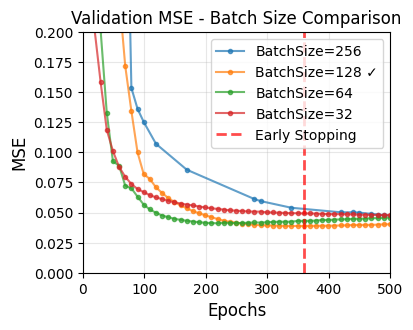

In [4]:
entity = "carlahugod-danmarks-tekniske-universitet-dtu"
project = "GNN_semi_supervised"
metrics = ['val_MSE']
runs_ids = ['yq0bj14f','04ftmt8x', 'rlmvsj7m','ksn7m63w'] 
labels = ['BatchSize=256', 'BatchSize=128 ✓', 'BatchSize=64', 'BatchSize=32']

for metric in metrics:
    runs_data = fetch_multiple_runs(entity, project, runs_ids, metric)

    plt.figure(figsize=(4, 3))
    for run_id, data in runs_data.items():
        history = data["history"]

        label = labels[runs_ids.index(run_id)] if labels else run_id

        # Plot the metric
        if metric in history.columns and "_step" in history.columns:
            # Filter out NaN values
            valid_data = history[[metric, "_step"]].dropna()
            plt.plot(valid_data["_step"], valid_data[metric], label=label, marker='o', markersize=3, alpha=0.7)
        else:
            print(f"Warning: {metric} not found in run {run_id}")

    plt.axvline(x=360, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Early Stopping')
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.ylim(0,0.2)
    plt.xlim(0,500)
    plt.tight_layout()
    plt.title('Validation MSE - Batch Size Comparison')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.show()

# Optimizers

✓ Fetched data for run: GINE_lr0005_wd0050_SGD_seed=0 (71pjv5j6)
✓ Fetched data for run: GINE_lr0005_wd0050_Adam_seed=0 (rxfyibk9)
✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_seed=0 (6vl60a3a)


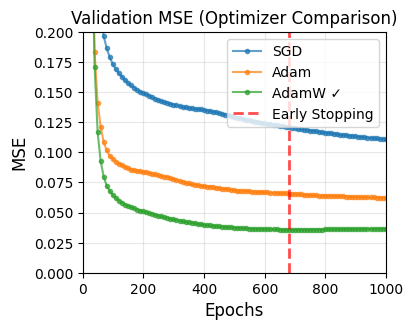

In [17]:
entity = "carlahugod-danmarks-tekniske-universitet-dtu"
project = "GNN_semi_supervised"
metrics = ['val_MSE']
runs_ids = ['71pjv5j6','rxfyibk9', '6vl60a3a']
labels = ['SGD', 'Adam', 'AdamW ✓']

for metric in metrics:
    runs_data = fetch_multiple_runs(entity, project, runs_ids, metric)

    plt.figure(figsize=(4, 3))
    for run_id, data in runs_data.items():
        history = data["history"]

        label = labels[runs_ids.index(run_id)] if labels else run_id

        # Plot the metric
        if metric in history.columns and "_step" in history.columns:
            # Filter out NaN values
            valid_data = history[[metric, "_step"]].dropna()
            plt.plot(valid_data["_step"], valid_data[metric], label=label, marker='o', markersize=3, alpha=0.7)
        else:
            print(f"Warning: {metric} not found in run {run_id}")

    plt.axvline(x=680, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Early Stopping')
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.ylim(0,0.2)
    plt.xlim(0,1000)
    plt.tight_layout()
    plt.title('Validation MSE (Optimizer Comparison)')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.show()

✓ Fetched data for run: GINE_lr0050_wd0050_AdamW_seed=0 (oo7ajq04)
✓ Fetched data for run: GINE_lr0010_wd0050_AdamW_seed=0 (ewipmny4)
✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_seed=0 (6vl60a3a)


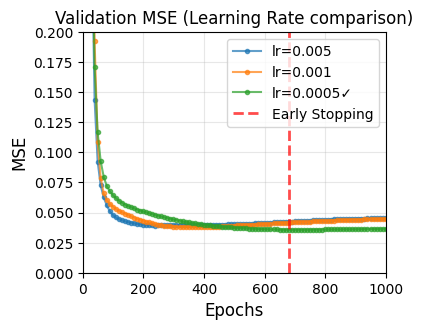

In [20]:
entity = "carlahugod-danmarks-tekniske-universitet-dtu"
project = "GNN_semi_supervised"
metrics = ['val_MSE']
runs_ids = ['oo7ajq04','ewipmny4', '6vl60a3a']
labels = ['lr=0.005', 'lr=0.001', 'lr=0.0005✓']

for metric in metrics:
    runs_data = fetch_multiple_runs(entity, project, runs_ids, metric)

    plt.figure(figsize=(4, 3))
    for run_id, data in runs_data.items():
        history = data["history"]

        label = labels[runs_ids.index(run_id)] if labels else run_id

        # Plot the metric
        if metric in history.columns and "_step" in history.columns:
            # Filter out NaN values
            valid_data = history[[metric, "_step"]].dropna()
            plt.plot(valid_data["_step"], valid_data[metric], label=label, marker='o', markersize=3, alpha=0.7)
        else:
            print(f"Warning: {metric} not found in run {run_id}")

    plt.axvline(x=680, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Early Stopping')
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.ylim(0,0.2)
    plt.xlim(0,1000)
    plt.tight_layout()
    plt.title('Validation MSE (Learning Rate comparison)')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.show()

✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_seed=0 (6vl60a3a)
✓ Fetched data for run: GINE_lr0005_wd0010_AdamW_seed=0 (1gitusom)
✓ Fetched data for run: GINE_lr0005_wd0005_AdamW_seed=0 (p83l55m6)


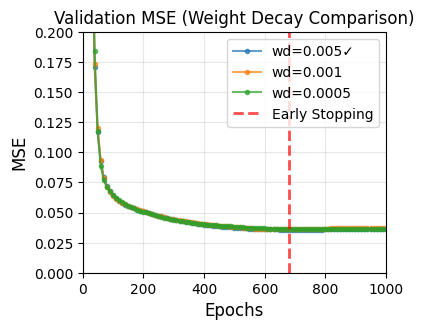

In [24]:
entity = "carlahugod-danmarks-tekniske-universitet-dtu"
project = "GNN_semi_supervised"
metrics = ['val_MSE']
runs_ids = ['6vl60a3a','1gitusom', 'p83l55m6']
labels = ['wd=0.005✓', 'wd=0.001', 'wd=0.0005']

for metric in metrics:
    runs_data = fetch_multiple_runs(entity, project, runs_ids, metric)

    plt.figure(figsize=(4, 3))
    for run_id, data in runs_data.items():
        history = data["history"]

        label = labels[runs_ids.index(run_id)] if labels else run_id

        # Plot the metric
        if metric in history.columns and "_step" in history.columns:
            # Filter out NaN values
            valid_data = history[[metric, "_step"]].dropna()
            plt.plot(valid_data["_step"], valid_data[metric], label=label, marker='o', markersize=3, alpha=0.7)
        else:
            print(f"Warning: {metric} not found in run {run_id}")

    plt.axvline(x=680, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Early Stopping')
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.ylim(0,0.2)
    plt.xlim(0,1000)
    plt.tight_layout()
    plt.title('Validation MSE (Weight Decay Comparison)')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.show()

✓ Fetched data for run: GINE_lr0005_wd0050_SGD_seed=0 (71pjv5j6)
✓ Fetched data for run: GINE_lr0005_wd0050_Adam_seed=0 (rxfyibk9)
✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_seed=0 (6vl60a3a)
✓ Fetched data for run: GINE_lr0050_wd0050_AdamW_seed=0 (oo7ajq04)
✓ Fetched data for run: GINE_lr0010_wd0050_AdamW_seed=0 (ewipmny4)
✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_seed=0 (6vl60a3a)
✓ Fetched data for run: GINE_lr0005_wd0050_AdamW_seed=0 (6vl60a3a)
✓ Fetched data for run: GINE_lr0005_wd0010_AdamW_seed=0 (1gitusom)
✓ Fetched data for run: GINE_lr0005_wd0005_AdamW_seed=0 (p83l55m6)


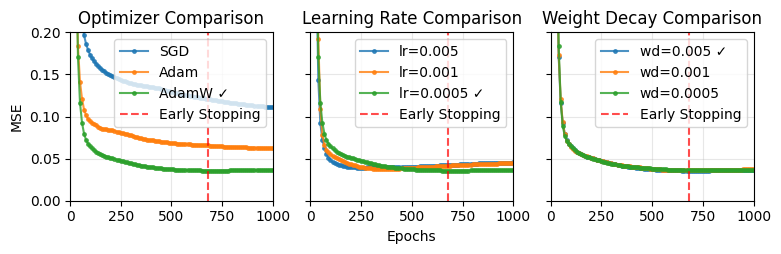

In [35]:
import matplotlib.pyplot as plt

entity = "carlahugod-danmarks-tekniske-universitet-dtu"
project = "GNN_semi_supervised"
metric = "val_MSE"

# Define the three comparisons
comparisons = [
    {
        "runs_ids": ['71pjv5j6','rxfyibk9','6vl60a3a'],
        "labels": ['SGD', 'Adam', 'AdamW ✓'],
        "title": "Optimizer Comparison"
    },
    {
        "runs_ids": ['oo7ajq04','ewipmny4','6vl60a3a'],
        "labels": ['lr=0.005', 'lr=0.001', 'lr=0.0005 ✓'],
        "title": "Learning Rate Comparison"
    },
    {
        "runs_ids": ['6vl60a3a','1gitusom','p83l55m6'],
        "labels": ['wd=0.005 ✓', 'wd=0.001', 'wd=0.0005'],
        "title": "Weight Decay Comparison"
    }
]

fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)

for ax, comp in zip(axes, comparisons):

    runs_ids = comp["runs_ids"]
    labels = comp["labels"]
    runs_data = fetch_multiple_runs(entity, project, runs_ids, metric)

    for run_id, data in runs_data.items():
        history = data["history"]
        label = labels[runs_ids.index(run_id)]

        if metric in history.columns and "_step" in history.columns:
            valid = history[[metric, "_step"]].dropna()
            ax.plot(
                valid["_step"],
                valid[metric],
                label=label,
                marker='o',
                markersize=2.5,
                alpha=0.8
            )
        else:
            print(f"Warning: {metric} missing in run {run_id}")

    # Early stopping vertical line
    ax.axvline(680, color='red', linestyle='--', linewidth=1.5, alpha=0.7)

    ax.set_title(comp["title"], fontsize=12)
    ax.grid(True, alpha=0.3)

    # Legend for each subplot (including early stopping)
    handles, leg_labels = ax.get_legend_handles_labels()
    handles.append(
        plt.Line2D([0], [0], color='red', linestyle='--', linewidth=1.5, alpha=0.7)
    )
    leg_labels.append("Early Stopping")
    ax.legend(handles, leg_labels, fontsize=10, loc="upper right")

# Axis labels
axes[0].set_ylabel("MSE")
axes[1].set_xlabel("Epochs")

# Consistent scales
axes[0].set_ylim(0, 0.2)
axes[0].set_xlim(0, 1000)

plt.tight_layout(rect=[0, 0.12, 1, 1])
plt.show()